
# <span style="color: #ed8632;"> Exploração e análise de dados de crédito</span>

## <span style="color: #ed8632;">1.0 Introdução ao caso</span>

- Análise com o intuíto de vericar as principais características dos clientes, promovendo assim maior entedimento sobre as interações destes clientes com o banco, e realizar uma análise geral de perfil;
- Com isso será possível obter insights para perfis de clientes sobre a sobre possibilidade de melhoria do tipo de cartão, aumento no limite de crédito, maior oferta de produtos, etc ...

Obs:
1) Estudo de caso para trabalho de conclusão de módulo de SQL, do curso de Ciência de Dados da instituição Ebac

2) Análises realizadas através do Athena (AWS)

## <span style="color: #ed8632;">2.0 Descritivo sobre cada atributo</span>


| Coluna  | Descrição |
| ------- | --------- |
| idade | --- |
| sexo | M(male), F(female) |
| dependentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

## <span style="color: #ed8632;">2.0 Imports</span>

In [4]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt 
import seaborn as sns

## <span style="color: #ed8632;">3.0 Carregamento dos dados</span>

Referência: 
https://www.kaggle.com/datasets/gabrielfigaterribile/cliente-banco/data (colocar aqui o endereço do dataset no kaggle)

In [5]:
%%time
df = pd.read_csv('cliente.csv', na_values='na', encoding='utf8') 

quant_linhas, quant_colunas = df.shape
print(f'Quantidade de linhas: {quant_linhas}')
print(f'Quantidade de colunas: {quant_colunas}\n')

Quantidade de linhas: 2564
Quantidade de colunas: 13

Wall time: 25.4 ms


In [6]:
df.head(5)

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inatico_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,60k-80k,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,40k ou menos,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,80k-120k,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,NaN,40k ou menos,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,60k-80k,blue,5,0,1,4716.22,816.08,28


### <span style="color: #ed8632;">4.0 Análise exploratória</span>

In [7]:
# Query1
# Número de linhas 
query = """
        SELECT COUNT(*)
        FROM df 
        """
result = ps.sqldf(query, locals())
result

,COUNT(*)
0,2564


#### <span style="color: #eb1a1a;">4.1 Análise da variável sexo em relação às demais variáveis</span>

In [29]:
# Query2
# Distribuição de pessoas por sexo
query = """
        SELECT sexo, COUNT(*) AS contagem
        FROM df 
        GROUP BY sexo
        """
result = ps.sqldf(query, locals())
result

,sexo,contagem
0,F,1001
1,M,1563


In [9]:
# Query3
# Dados estatísticos sobre limite de crédito por sexo
query = """
        SELECT sexo, MAX(limite_credito), MIN(limite_credito), AVG(limite_credito)
        FROM df 
        WHERE limite_credito != 'na'
        GROUP BY sexo
        """
result = ps.sqldf(query, locals())
result

,sexo,MAX(limite_credito),MIN(limite_credito),AVG(limite_credito)
0,F,34516.99,1438.03,5748.984206
1,M,34516.99,1438.07,11201.357415


- Possível notar uma grande diferença na média de limite crédito entre os homens e as mulheres, mesmo que os valores máximo e mínimo sejam igual entre ambos os sexo;
- A média de limite de crédito dos homens é 94% maior que das mulheres

In [10]:
# Query4
# Dados estatísticos sobre valor_transações (12 meses) por sexo
query = """
        SELECT sexo, MAX(valor_transacoes_12m), MIN(valor_transacoes_12m), AVG(valor_transacoes_12m)
        FROM df 
        WHERE valor_transacoes_12m != 'na'
        GROUP BY sexo
        """
result = ps.sqldf(query, locals())
result

,sexo,MAX(valor_transacoes_12m),MIN(valor_transacoes_12m),AVG(valor_transacoes_12m)
0,F,4776.58,510.16,1839.622507
1,M,4686.93,530.36,1807.968004


- Não é possível verificar nenhuma variação no valor de transações por sexo.

In [11]:
# Query5
# Dados estatísticos sobre quant. transações (12 meses) por sexo
query = """
        SELECT sexo, MAX(qtd_transacoes_12m), MIN(qtd_transacoes_12m), AVG(qtd_transacoes_12m)
        FROM df 
        WHERE qtd_transacoes_12m != 'na'
        GROUP BY sexo
        """
result = ps.sqldf(query, locals())
result

,sexo,MAX(qtd_transacoes_12m),MIN(qtd_transacoes_12m),AVG(qtd_transacoes_12m)
0,F,103,12,42.283716
1,M,89,10,41.333333


- Mesmo que haja uma variação entre as quantidades max e min de transações (12m), esta diferença não é tão evidente, e a média se mantém bem próxima entre ambos os sexos

In [12]:
# query6
query = """
        SELECT sexo, COUNT(sexo), salario_anual
        FROM df 
        WHERE Salario_anual != 'na' AND sexo = 'M'
        GROUP BY sexo, Salario_anual
        """
result = ps.sqldf(query, locals())
result

,sexo,COUNT(sexo),salario_anual
0,M,222,120k ou mais
1,M,104,40k ou menos
2,M,274,40k-60k
3,M,451,60k-80k
4,M,488,80k-120k


In [13]:
#Query7
query = """
        SELECT sexo, COUNT(sexo), salario_anual
        FROM df 
        WHERE Salario_anual != 'na' AND sexo = 'F'
        GROUP BY sexo, Salario_anual
        """
result = ps.sqldf(query, locals())
result

,sexo,COUNT(sexo),salario_anual
0,F,597,40k ou menos
1,F,193,40k-60k


- É possível verificar uma grande diferença entre o salário entre as mulheres e os homens;
- 100% da mulheres recebem um salário de 60k ou menos, nesta mesma faixa salarial, corresponde a somente 24% dos homens

#### <span style="color: #eb1a1a;">4.1 Análise da variável salario anual e escolariadade</span>

In [21]:
#query8
#distribuição de escolaridade por faixa salarial 

query = """
        SELECT escolaridade, 
        COUNT(escolaridade) AS contagem, 
        (COUNT(escolaridade) * 100.0 / SUM(COUNT(escolaridade)) OVER ()) AS percentual
        FROM df
        WHERE escolaridade != 'None'
        GROUP BY escolaridade
        """
result = ps.sqldf(query, locals())
result

,escolaridade,contagem,percentual
0,doutorado,235,10.595131
1,ensino medio,545,24.571686
2,graduacao,261,11.767358
3,mestrado,810,36.519387
4,sem educacao formal,367,16.546438


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


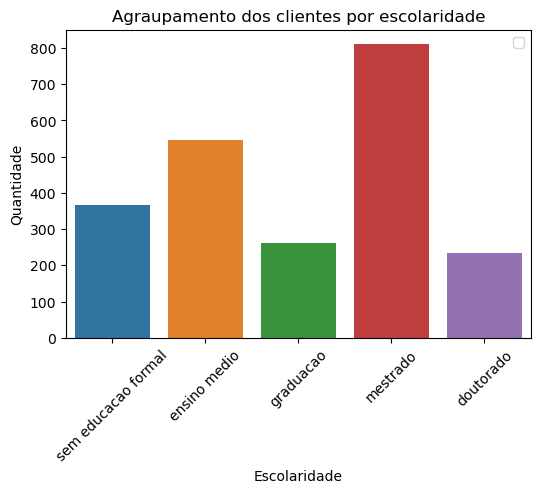

In [20]:
plt.figure(figsize=(6, 4))
order = ['sem educacao formal', 'ensino medio', 'graduacao', 'mestrado', 'doutorado']
sns.barplot(x='escolaridade', y='contagem', data=result, order=order)

# Adicionar título e rótulos
plt.title('Agraupamento dos clientes por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.legend(title='')
plt.xticks(rotation=45)  # Rotaciona as labels em 45 graus

# Mostrar o gráfico
plt.show()

- Há uma predominância de pessoas sem edução formal / ensino médio neste dataset, contudo se avaliarmos as pessoas com curso superior, este grupo equivale a 60% do total.

In [26]:
#query9
query = """
        SELECT escolaridade, 
               CASE 
                   WHEN salario_anual = '80k-120k' OR salario_anual = '120k ou mais' THEN 'maior que 80k'
                   ELSE 'na'
               END AS salario_anual_agrupado,
               COUNT(salario_anual) AS contagem,
               (COUNT(salario_anual) * 100.0 / SUM(COUNT(salario_anual)) OVER ()) AS percentual,
               tipo_cartao
        FROM df 
        WHERE escolaridade != 'None'
        GROUP BY escolaridade, salario_anual_agrupado, tipo_cartao
        HAVING salario_anual_agrupado = 'maior que 80k'
        ORDER BY tipo_cartao
        """
result = ps.sqldf(query, locals())
result

,escolaridade,salario_anual_agrupado,contagem,percentual,tipo_cartao
0,doutorado,maior que 80k,59,9.640523,blue
1,ensino medio,maior que 80k,138,22.549020,blue
2,graduacao,maior que 80k,81,13.235294,blue
3,mestrado,maior que 80k,213,34.803922,blue
4,sem educacao formal,maior que 80k,89,14.542484,blue
5,ensino medio,maior que 80k,4,0.653595,gold
6,mestrado,maior que 80k,1,0.163399,platinum
7,doutorado,maior que 80k,2,0.326797,silver
8,ensino medio,maior que 80k,5,0.816993,silver
9,graduacao,maior que 80k,6,0.980392,silver


- Através da query acima, foram filtrados somente os clientes com salario anual maior que 80k
- Somente 0,16% e 0,65% dos clientes possuem cartão platinum e gold consecutivamente;
- Isso mostra uma grande oportunidade de melhoria de categoria de cartão para os clientes com esta faixa salarial.

In [36]:
# query10

query = """
        SELECT 
            COUNT(*) AS contagem, 
            salario_anual_agrupado,
            AVG(limite_credito) AS media_limite_credito,
            AVG(valor_transacoes_12m) AS media_valor_transacoes,
            AVG(qtd_transacoes_12m) AS media_quant_transacoes,
            AVG(qtd_produtos) AS media_qtd_produtos
        FROM (
            SELECT 
                CASE
                    WHEN salario_anual = '40k ou menos' OR salario_anual = '40k-60k' THEN '1) até 60k'
                    WHEN salario_anual = '60k-80k' THEN '2) 60k-80k'
                    WHEN salario_anual = '80k-120k' OR salario_anual = '120k ou mais' THEN '3) Mais que 80k'
                END AS salario_anual_agrupado,
                limite_credito,
                valor_transacoes_12m,
                qtd_transacoes_12m,  
                qtd_produtos
            FROM df 
            WHERE salario_anual != 'None'
        ) AS subquery
        GROUP BY salario_anual_agrupado
        ORDER BY media_limite_credito DESC;
        """
result = ps.sqldf(query, locals())
result.to_excel("salario e escolaridade.xlsx", index=False)
result

,contagem,salario_anual_agrupado,media_limite_credito,media_valor_transacoes,media_quant_transacoes,media_qtd_produtos
0,710,3) Mais que 80k,15797.985324,1738.432704,40.257746,4.329577
1,451,2) 60k-80k,9096.028337,1818.636341,41.097561,4.352550
2,1168,1) até 60k,4598.814015,1852.941618,42.521404,4.385274


- Através desta query, os clientes foram agrupados em 3 grupos em relação ao salário, para uma melhor verificação/comparação entre os grupos.
- Além do limite de crédito médio para o grupo 3* (mais que 80k) ser maior que os outros grupos,  demais fatores de interação com o banco são parecidos com os outros grupos.

In [28]:
#query 11
query = """
        SELECT 
        COUNT(escolaridade) AS contagem, 
        CASE
            WHEN salario_anual = '40k ou menos' OR salario_anual = '40k-60k' THEN '1) até 60k'
            WHEN salario_anual = '60k-80k' THEN '2) 60k-80k'
            WHEN salario_anual = '80k-120k' OR salario_anual = '120k ou mais' THEN '3) Mais que 80k'
        END AS salario_anual_agrupado,
        escolaridade,
        AVG(limite_credito) AS media_limite_credito,
        AVG(valor_transacoes_12m) AS media_valor_transacoes,
        AVG(qtd_produtos) AS media_qtd_produtos
        FROM df 
        WHERE 
            escolaridade != 'None' AND salario_anual != 'None'
        GROUP BY 
            salario_anual_agrupado, escolaridade
        ORDER BY 
            media_valor_transacoes DESC;
        """
result = ps.sqldf(query, locals())
result

,contagem,salario_anual_agrupado,escolaridade,media_limite_credito,media_valor_transacoes,media_qtd_produtos
0,112,1) até 60k,graduacao,4343.701429,1924.508929,4.366071
1,102,1) até 60k,doutorado,4619.224412,1874.940588,4.294118
2,44,2) 60k-80k,graduacao,10669.267727,1862.392273,4.340909
3,181,1) até 60k,sem educacao formal,4636.749282,1860.791215,4.331492
4,135,2) 60k-80k,mestrado,9062.204963,1859.279778,4.192593
5,381,1) até 60k,mestrado,4624.182782,1851.358793,4.438320
6,45,2) 60k-80k,doutorado,8109.444000,1831.912222,4.488889
7,240,1) até 60k,ensino medio,4676.145333,1813.494000,4.329167
8,108,2) 60k-80k,ensino medio,8254.060833,1789.184537,4.407407
9,87,3) Mais que 80k,graduacao,16311.645747,1758.518391,3.977011


- Objetivo desta query foi deixar os dados de modo mais granular, colocando mais um agrupamento (escolaridade);
- Para todos os grupos, a média de quantidade de produtos é de 4, com isso, talvez a criação de produtos específicos, possa levar a uma maior percentual de contratação de produtos. 
- Grupos de clientes com salário até 80k tem uma média de valor de transações maior.

Conclusões: 
- Mesmo que a média salarial e o limite de crédito entre homens e mulheres sejam bem diferentes, isto não se traduziu em um maior percentual nos demais atributos (ex.: quant. prodos, quant. transações, etc) para os homens.
- Clientes sem educação formal / com ensino médio correnspondem a 40% deste dataset.
- Há poucos clientes com cartão gold/platinum quando verificamos as pessoas com faixa salarial maior que 80k, e um maior enfoque na melhoria da categoria do cartão para este grupod e pessoas pode representar uma maior fidelização e aumento na receita do banco;
- Quando comparamos os cliente por faixa salarial e educação, verificamos que a média é de 4 uso de produto. Com a implementação de produtos focados em grupos especiicos, isto poderia acarretar numa maior aquisição de produtos.